In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import folium

In [93]:
data = pd.read_csv("/Users/josefbautista/Documents/DataScience/NYPD_Shooting_Incident_Data__Year_To_Date_.csv" , delimiter=",")
data.head(21)



,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
2,203041425,09/29/2019,23:15:00,BRONX,52,0.0,NaN,False,25-44,M,WHITE HISPANIC,18-24,M,BLACK HISPANIC,1010668,253614,40.862755,-73.904493
3,203041429,09/29/2019,18:30:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,962585,165738,40.621571,-74.078043
4,203041424,09/29/2019,00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917
5,203041430,09/28/2019,01:17:00,BRONX,42,0.0,NaN,True,NaN,NaN,NaN,18-24,M,BLACK,1012860,244801,40.838559,-73.896606
6,203042901,09/27/2019,23:29:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,45-64,M,BLACK,1019084,183993,40.671635,-73.874428
7,203041427,09/27/2019,21:45:00,QUEENS,101,0.0,NaN,False,18-24,M,BLACK,25-44,F,BLACK,1051162,155661,40.593685,-73.759070
8,203041423,09/27/2019,20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,F,BLACK,1013031,182526,40.667630,-73.896254
9,203041423,09/27/2019,20:40:00,BROOKLYN,75,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,1013031,182526,40.667630,-73.896254


In [99]:
data1 =data.dropna(subset = ['INCIDENT_KEY','OCCUR_DATE','OCCUR_TIME','BORO','PRECINCT','JURISDICTION_CODE','LOCATION_DESC','STATISTICAL_MURDER_FLAG','PERP_AGE_GROUP','PERP_SEX','PERP_RACE','VIC_AGE_GROUP','VIC_SEX','VIC_RACE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude'])
data1.head(100)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
1,203083804,09/30/2019,13:49:00,MANHATTAN,23,2.0,MULTI DWELL - PUBLIC HOUS,True,18-24,M,BLACK,18-24,M,BLACK,998869,230618,40.799665,-73.947200
4,203041424,09/29/2019,00:35:00,BRONX,47,2.0,MULTI DWELL - PUBLIC HOUS,True,25-44,M,BLACK,25-44,M,WHITE,1026855,262287,40.886497,-73.845917
17,202944932,09/26/2019,02:30:00,BRONX,40,2.0,MULTI DWELL - PUBLIC HOUS,False,25-44,F,BLACK HISPANIC,25-44,M,BLACK,1005170,235308,40.812525,-73.924427
21,202853371,09/24/2019,17:45:00,BROOKLYN,73,2.0,MULTI DWELL - PUBLIC HOUS,False,18-24,M,BLACK,18-24,M,BLACK,1006117,183402,40.670054,-73.921175
22,202853369,09/24/2019,16:35:00,BRONX,46,0.0,MULTI DWELL - APT BUILD,False,18-24,M,BLACK,<18,M,BLACK,1006938,248232,40.847994,-73.917996
26,202804357,09/23/2019,11:45:00,MANHATTAN,23,2.0,MULTI DWELL - APT BUILD,False,25-44,M,BLACK,18-24,M,BLACK HISPANIC,998950,229227,40.795847,-73.946910
29,202770945,09/22/2019,20:38:00,BRONX,42,0.0,MULTI DWELL - APT BUILD,True,25-44,M,BLACK,25-44,M,BLACK,1008459,239672,40.824495,-73.912529
40,202562770,09/17/2019,22:37:00,BRONX,44,2.0,MULTI DWELL - PUBLIC HOUS,False,UNKNOWN,U,UNKNOWN,25-44,M,UNKNOWN,1007174,239543,40.824144,-73.917173
45,202457199,09/15/2019,23:20:00,BROOKLYN,88,0.0,MULTI DWELL - APT BUILD,True,45-64,M,BLACK,25-44,F,BLACK,992117,193223,40.697034,-73.971631


In [ ]:
#With the demographic information we’d like to determine if there are any significant 
#correlations that may shed light on the probability of perps being a particular ethnic race,
#depending on the victims age, gender and/or ethnicity. Next, we’d like to also find out if there 
#is a correlation to a particular location, i.e. Do certain precincts/geographical coordinates have a 
#significantly higher rate of incidents than others, do these locations have a particular victim or perp ‘type’,
#and are there certain times of day when most incidents are reported. Although we are given the borough of the
#incident, we’d like to dig deeper into the exact locations and determine if there are specific areas where these 
#incidents occur and if each of these areas have a perp and victim ‘type’ as well. 

(40.6, 40.9)

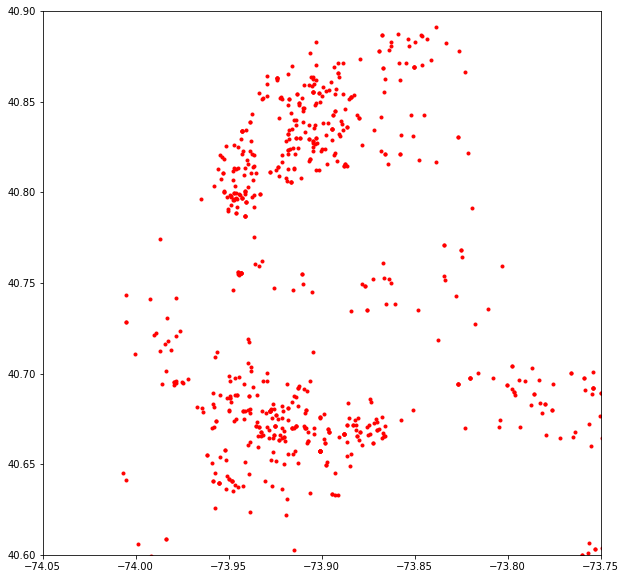

In [27]:
#Highlighted areas are area with crimes
plt.figure(figsize=(10, 10))
plt.plot(data['Longitude'], data['Latitude'],
         
         'r.',
         alpha=1.)
plt.xlim(-74.05, -73.75)
plt.ylim(40.6, 40.9) 

In [66]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [67]:
base_map =generateBaseMap()

In [68]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data[['Latitude', 'Longitude']].groupby(['Latitude', 'Longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [69]:
#Highlighted areas are area with crimes
base_map

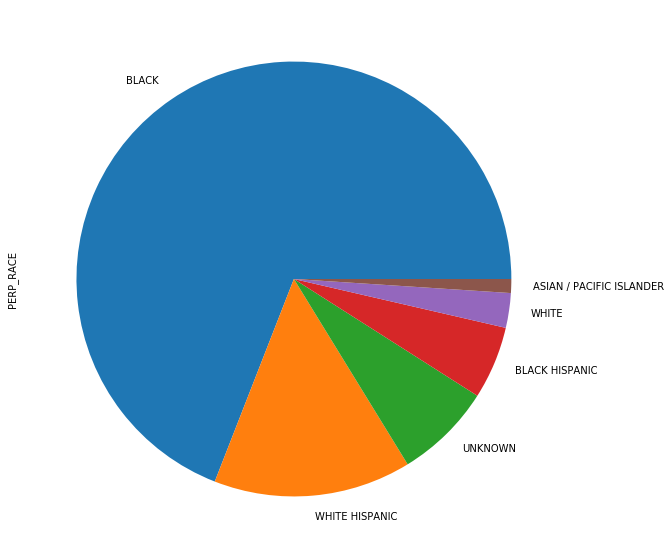

In [71]:
#Race of perpitrators 
data['PERP_RACE'].value_counts().plot.pie(figsize=(10, 10))

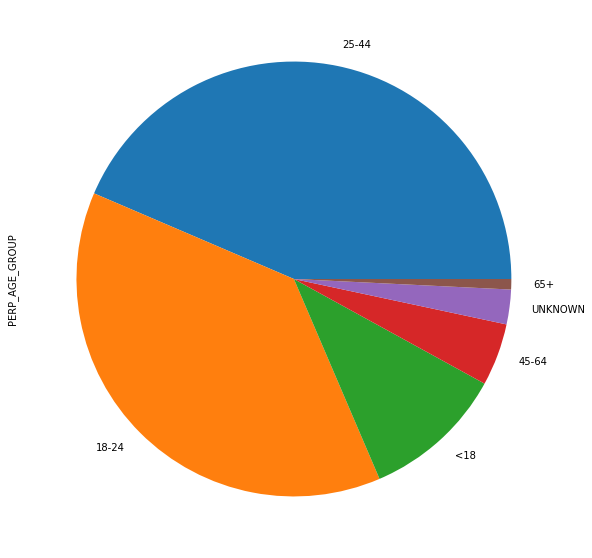

In [70]:
#Age group of perpitrators
data['PERP_AGE_GROUP'].value_counts().plot.pie(figsize=(10, 10))